<h1>Analyzing Reddit Data</h1>
<ul>Objectives:
    <li>Identify problems people of India talk about online. </li>
    <li>Get insights and make inferences.</li>
    <li>Make a model which classifies problem based on input prompt.</li>
</ul>
<hr>
<h2>1) Data Loading & Processing</h2>
Refer data_collection.py which contains the script to collect appropriate data and save it as a csv file, uses PRAW, which is a reddit wrapper in order to fetch data from reddit. 
<h3>1.1) Loading Data</h3>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('datacollection.csv')
data.head()

,NumComments,Flair,Upvotes,UpvoteRatio,Over18,Media,Body,Title,URL,ID
0,300,Culture,5397,0.94,False,NaN,NaN,Finally convinced dad to remove plastic covers...,https://i.redd.it/9augyh3dgtf91.jpg,wgkyvg
1,62,Sports,4394,0.99,False,NaN,NaN,Avinash Sable - Remember the name,https://i.redd.it/62a5jcutt4g91.png,whu852
2,151,Science,3932,0.99,False,"{'reddit_video': {'bitrate_kbps': 2400, 'fallb...",NaN,Science class at Punjab.,https://v.redd.it/g0ggxwe8vvf91,wgtft4
3,335,Politics,3771,0.88,False,NaN,NaN,How Freedom Fighters would be treated today,https://i.redd.it/qxo9lcmm3ng91.jpg,wjwwb8
4,83,Sports,3326,0.97,False,NaN,NaN,Unbelievable stuff happening in Commonwealth g...,https://i.redd.it/2hx9n519y9g91.png,wida8j


In [93]:
data.shape

(937, 10)

In [92]:
data['Flair'].value_counts()

AskIndia         371
Politics         102
Non-Political     86
Rant              60
Policy            45
Sports            39
Business          29
Science           29
Crime             27
Culture           26
Art               25
Law               20
Health            20
History           15
Immigration       13
Meme              10
Food               7
Scheduled          6
Foreign            5
Religion           1
Coronavirus        1
Name: Flair, dtype: int64

<h3>1.2) Checking Flair distribution</h3>

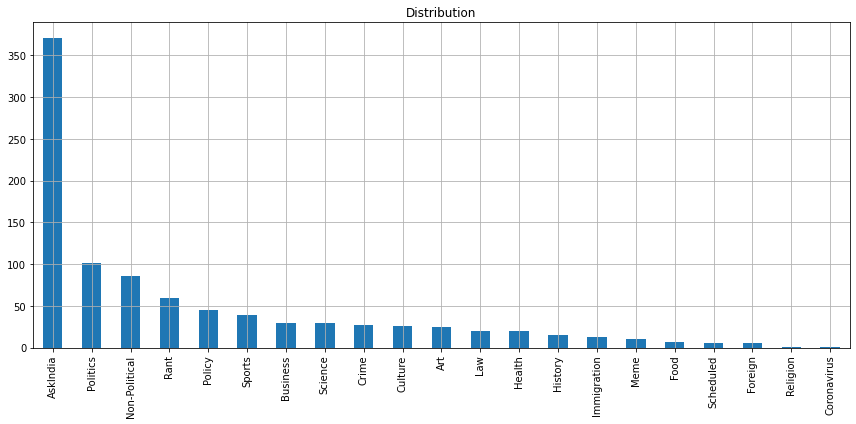

In [3]:
# Checking distribution of classes
data['Flair'].value_counts().plot(kind='bar',figsize=(12,6),title='Distribution')
plt.grid()
plt.tight_layout()
plt.show()

 When making a post to reddit, the user has to choose a flair which suits his/her/their submission
 so that it is easier for the community to interact. These flairs can be a good starting point
 in investigating the problems people of India face and talk about online.

In [5]:
# The rows having NaN value for media -> False // non NaN value -> True

# Na values filled with False
data['Media'] = data['Media'].fillna('False')

for i in range(len(data['Media'])):
    # if value is False, pass
    if data['Media'][i] == 'False':
        pass
    # if values isnt False, set it to True
    else:
        data['Media'][i] = 'True'

<ipython-input-5-6719622238f9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Media'][i] = 'True'


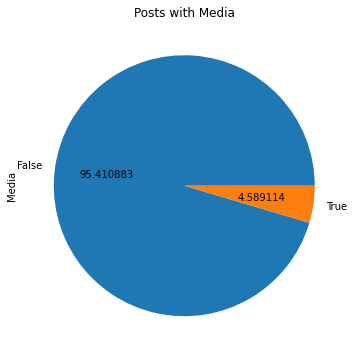

False    894
True      43
Name: Media, dtype: int64

In [91]:
# checking data distribution
data['Media'].value_counts().plot(kind='pie',figsize=(12,6),autopct="%f",title='Posts with Media')
plt.show()
data['Media'].value_counts()

<h3>1.3) Modifying Data</h3>

In [8]:
# Dropping flairs which have <= 10 posts. Sample size too small to make meaningful inference.
data['Flair'].value_counts() <= 10

AskIndia         False
Politics         False
Non-Political    False
Rant             False
Policy           False
Sports           False
Business         False
Science          False
Crime            False
Culture          False
Art              False
Law              False
Health           False
History          False
Immigration      False
Meme              True
Food              True
Scheduled         True
Foreign           True
Religion          True
Coronavirus       True
Name: Flair, dtype: bool

In [9]:
drop_flairs = ['Meme','Food','Scheduled','Foreign','Coronavirus','Religion']
# Creating a copy of the dataframe
data_ = data.copy()

for flair in drop_flairs:
    # getting index of rows where flair is from drop_flairs
    data_.drop(data_[(data_['Flair'] == flair)].index, inplace=True)

In [10]:
data_['Flair'].value_counts()

AskIndia         371
Politics         102
Non-Political     86
Rant              60
Policy            45
Sports            39
Business          29
Science           29
Crime             27
Culture           26
Art               25
Health            20
Law               20
History           15
Immigration       13
Name: Flair, dtype: int64

In [11]:
# getting dataframe which contains percent na values
def get_na_percent(df):
    na_value_df=df.isna().sum().reset_index()
    na_value_df.columns=["Features","Missing_Values"]
    na_value_df['Percentage %']=(na_value_df.Missing_Values/len(df))*100
    return na_value_df

na_df = get_na_percent(data)

In [12]:
na_df

,Features,Missing_Values,Percentage %
0,NumComments,0,0.000000
1,Flair,0,0.000000
2,Upvotes,0,0.000000
3,UpvoteRatio,0,0.000000
4,Over18,0,0.000000
5,Media,0,0.000000
6,Body,361,38.527215
7,Title,0,0.000000
8,URL,0,0.000000
9,ID,0,0.000000


In [13]:
# Making a pivot table
df_mean=pd.pivot_table(data_,index=['Flair'],values=['Upvotes','NumComments','UpvoteRatio'],
                         aggfunc=np.nanmean)

In [14]:
df_mean['NumPosts'] = data_['Flair'].value_counts()

In [15]:
df_mean

,NumComments,UpvoteRatio,Upvotes,NumPosts
Flair,,,,
Art,7.880000,0.856800,59.560000,25
AskIndia,17.487871,0.804555,23.787062,371
Business,18.896552,0.943793,63.758621,29
Crime,8.592593,0.855926,56.888889,27
Culture,28.115385,0.698846,297.807692,26
Health,18.700000,0.821500,48.900000,20
History,11.933333,0.839333,218.000000,15
Immigration,4.692308,0.750000,4.692308,13
Law,28.350000,0.871000,106.050000,20


<h2>2) Analysis and Insights</h2><br>
<h3>2.1) Most discussed topics </h3>
Comparing flairs based on the number of comments, number of comments (specifically -> average comments for a flair) is a good feature to determine whether a problem is talked about or not since it shows the number of interactions the community has made with the post // flair.

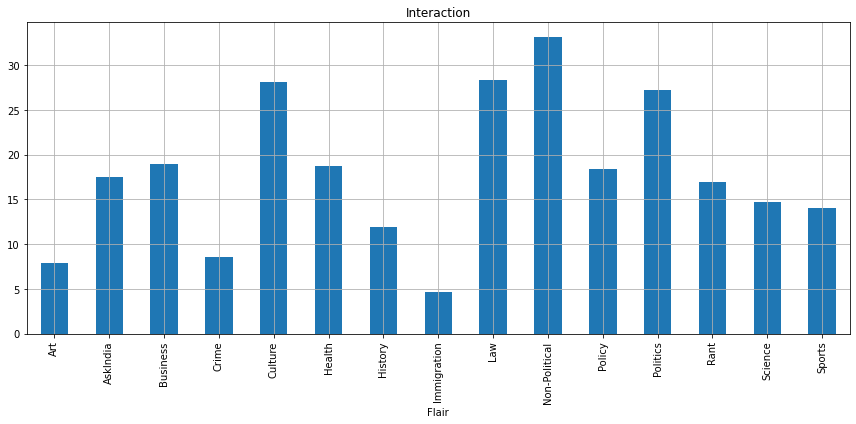

In [22]:
# Checking the average number of comments for each flair.
df_mean['NumComments'].plot(kind = 'bar',figsize = (12,6),title = "Interaction")
plt.grid()
plt.tight_layout()
plt.show()

<ul>Observations:
    <li>Highly Discussed Topics : Politics, Culture, Law, Non-Political</li>
    <li>Moderately Discussed Topics : Business, Health, Policy, Rant, Science, Sports</li>
    <li>Less Discussed Topics : Art, Crime, Immigration</li>
</ul>


<h3>2.2) Most common problems</h3>
Upvote ratio is a good metric in determining whether the community associates with the problem others are facing. A good ratio signifies the community agrees with the flair// submission made by a certain individual.

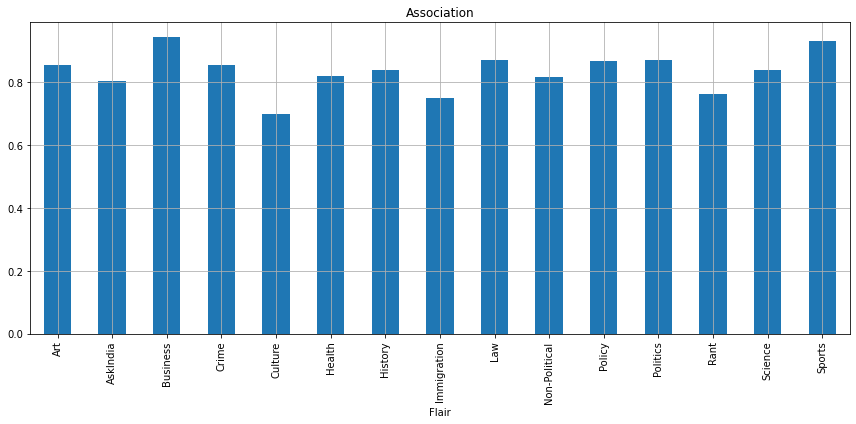

In [23]:
df_mean['UpvoteRatio'].plot(kind = 'bar',figsize = (12,6),title = "Association")
plt.grid()
plt.tight_layout()
plt.show()

<ul>Observations:
    <li>Topics with High Association : Business, Sports</li>
    <li>Topics with Moderate Association : Art, AskIndia, Crime, Health, History, Policy, Non Political, Political, Science</li>
    <li>Topics with Low Association : Culture, Immigration, Rant</li>
</ul>

<h3>2.3) Most Popular Problems</h3>

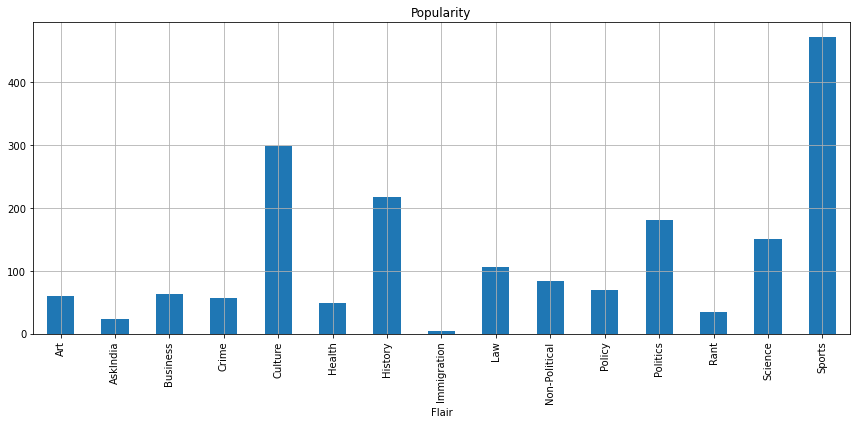

In [24]:
df_mean['Upvotes'].plot(kind = 'bar',figsize = (12,6),title = "Popularity")
plt.grid()
plt.tight_layout()
plt.show()

<ul>Observations:
    <li>Most Popular Topic : Sports</li>
    <li>Moderately Popular Topics : Culture, History, Politics, Science</li>
    <li>Least Popular Topics : Art, AskIndia, Business, Crime, Health, Immigration, Law, Non Political, Policy, Rant</li>
</ul>

<h3>2.4) Misc</h3>

In [25]:
import statistics
import scipy

<h4>2.4.1) Checking Skewness and Kurtosis</h4>

In [17]:
def get_common_stats(df,column_name,name):
    std_dev = statistics.stdev(df[column_name])
    skew = scipy.stats.skew(df[column_name])
    kurt = scipy.stats.kurtosis(df[column_name])
    
    print('='*50,name,'='*50)
    print(f'Standard  Deviation : {std_dev}\nSkewness : {skew}\nKurtosis : {kurt}')

In [19]:
columns = data_.columns
for column in columns :
    try:
        get_common_stats(data_,column,column)
    except:
        pass

================================================== NumComments ==================================================
Standard  Deviation : 62.452115737792724
Skewness : 11.316389202811248
Kurtosis : 185.44909115029742
================================================== Upvotes ==================================================
Standard  Deviation : 367.12000088099785
Skewness : 9.080682605809534
Kurtosis : 100.30199951632582
================================================== UpvoteRatio ==================================================
Standard  Deviation : 0.17792552377574852
Skewness : -1.1906872812005256
Kurtosis : 0.9296004258333768
================================================== Over18 ==================================================
Standard  Deviation : 0.10447887297001478
Skewness : 9.36542301618127
Kurtosis : 85.71114827201784


<ul>Observations:<br>
    <li>Number of Comments has the highest kurtosis, which means that the number of outliers present is huge, or there might less outliers but the magnitude of that is huge in comparision.</li>
    <li>Upvote ratio most closely resembles a normal distribution.</li>
</ul>

<h4>2.4.2) Analysing UpvoteRatio</h4>

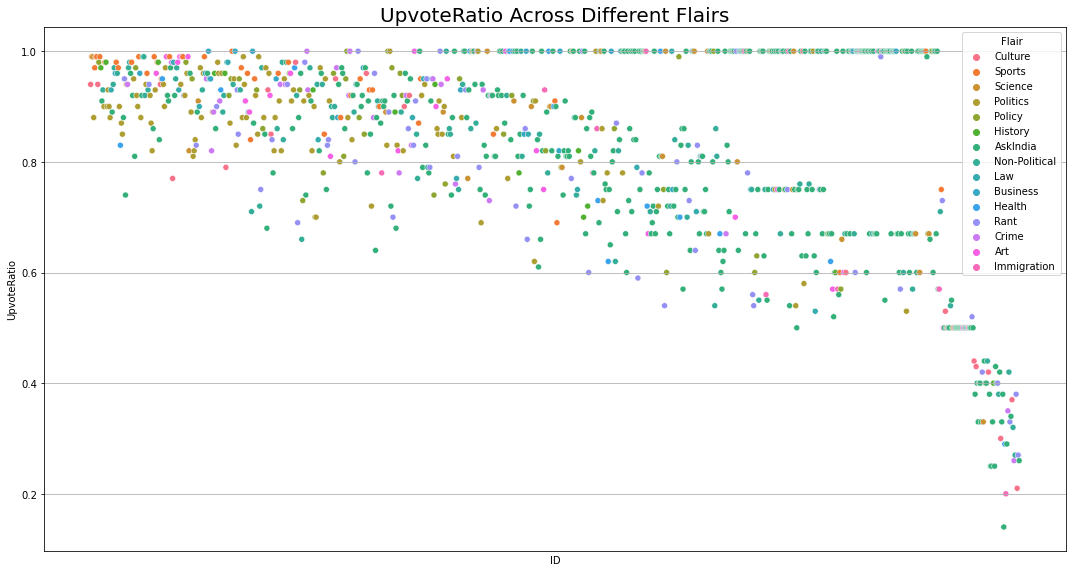

In [20]:
plt.figure(figsize= (15,8))
ax = sns.scatterplot(x="ID",y="UpvoteRatio",data=data_,hue='Flair')
plt.tight_layout()
ax.axes.get_xaxis().set_ticks([])
plt.grid()
plt.title('UpvoteRatio Across Different Flairs',fontsize = 20)
plt.show()

C:\Users\sahay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


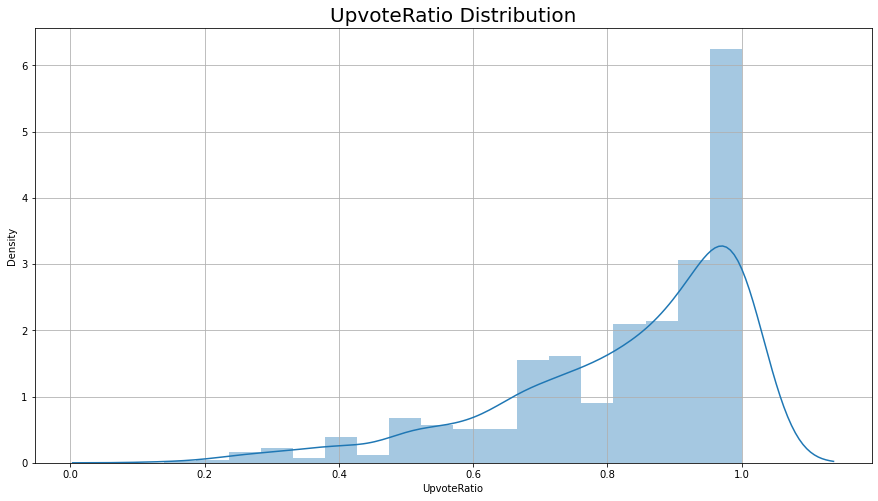

In [21]:
plt.figure(figsize = (15,8))
sns.distplot(data_['UpvoteRatio'])
plt.title('UpvoteRatio Distribution',fontsize=20)
plt.grid()
plt.show()

<h3>2.5) Hypothesis Testing</h3>

In [26]:
df_mean

,NumComments,UpvoteRatio,Upvotes,NumPosts
Flair,,,,
Art,7.880000,0.856800,59.560000,25
AskIndia,17.487871,0.804555,23.787062,371
Business,18.896552,0.943793,63.758621,29
Crime,8.592593,0.855926,56.888889,27
Culture,28.115385,0.698846,297.807692,26
Health,18.700000,0.821500,48.900000,20
History,11.933333,0.839333,218.000000,15
Immigration,4.692308,0.750000,4.692308,13
Law,28.350000,0.871000,106.050000,20


In [29]:
data_['Upvotes'].mean()

89.74090407938257

 Health has a mean of upvotes ~ 49 whereas the mean of upvotes for entire data is
 ~90. Since Health only has 20 observations, drawing inference for all submissions
 made under flair 'Health' using these 20 observations.
 Using student's t-test to determine and accept hypothesis.

<ul> <li>Null Hypothesis : the average upvotes among all posts tagged flair 'Health' is = 90.</li>
 <li>Alternate Hypothesis : the average upvotes for submissions tagged flair 'Health' is != 90. </li></ul>

 However in order to get appropriate results from t-test, the data distribution has to be normal.
 checking for normality

<h4>2.5.1) Checking For Normality</h4>

In [53]:
import scipy.stats as stats
import pylab

In [51]:
def normality_graph(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

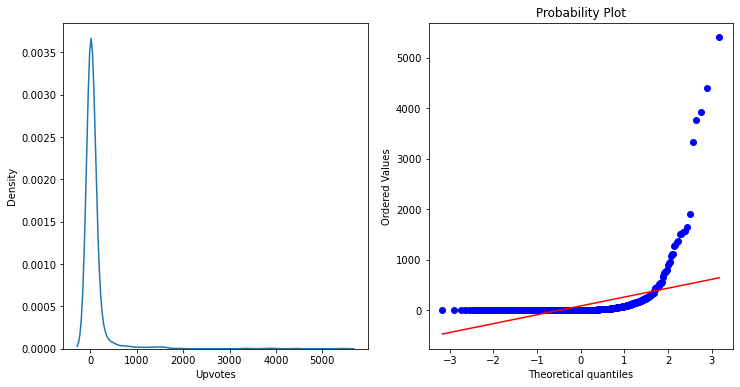

In [73]:
normality_graph(data_,'Upvotes')


 upvotes is not normally distributed, however it can become one on using a log(1+x) transform
 Since some values could have 0 upvotes, log 0 is NaN. while using a log(1+x) transform
 the minimum value would be log(1) = 0. This prevents any NaN value.

In [54]:
data_['UpvotesNormalized'] = np.log(data['Upvotes']+1)

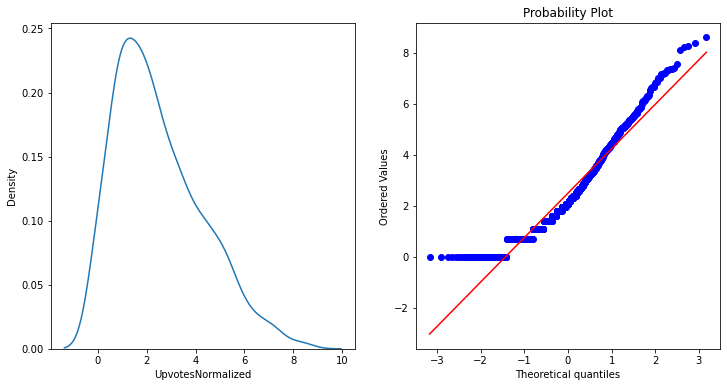

In [55]:
normality_graph(data_,'UpvotesNormalized')

In [57]:
 get_common_stats(data_,'Upvotes','Upvotes')

================================================== Upvotes ==================================================
Standard  Deviation : 367.12000088099785
Skewness : 9.080682605809534
Kurtosis : 100.30199951632582


In [56]:
 get_common_stats(data_,'UpvotesNormalized','Normalized Upvotes')

================================================== Normalized Upvotes ==================================================
Standard  Deviation : 1.7894278025431116
Skewness : 0.7674019000817344
Kurtosis : 0.060067208926944726


In [74]:
hypo_data = data_[(data_['Flair'] == "Health")]  

In [77]:
get_common_stats(hypo_data,'UpvotesNormalized','Normalized Upvotes -> Health')

================================================== Normalized Upvotes -> Health ==================================================
Standard  Deviation : 1.6346699514268686
Skewness : 1.09210489776921
Kurtosis : 0.5977204201505506


The data is now ready for performing statistical tests, it is normalized.

<h4>2.5.2) T- Test</h4>
A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables. I.E it can be used to get insight into a population's distribution based on a random sample from the population.<br><br>
A t-value is calculated and compared to t-critical (which is different for different data). If the t value is greater than the critical value, the null hypothesis is accepted. If the critical value is greater, the null hypothesis is rejected and alternate hypothesis is accepted.

In [58]:
def compute_t(pop_mean,sample_mean,std_dev,n_observations):
    
    t_value = (pop_mean-sample_mean)/(std_dev/n_observations**1/2)
    
    return t_value

In [83]:
#
pop_mean = 1.95 # Log(1+X) transformation of 90
sample_mean = np.mean(hypo_data['UpvotesNormalized'])
std_dev = statistics.stdev(hypo_data['UpvotesNormalized'])
n_observations = len(hypo_data)
print('='*50,'Parameters','='*50)
print(f'Populatiion Mean : {pop_mean}\nSample Mean : {sample_mean}\nStandard Deviation : {std_dev}\nNumber of Observations : {n_observations}')

================================================== Parameters ==================================================
Populatiion Mean : 1.95
Sample Mean : 2.2334646070408772
Standard Deviation : 1.6346699514268686
Number of Observations : 20


In [84]:
t_value = compute_t(pop_mean,sample_mean,std_dev,n_observations)
print(t_value)

-6.936314129795976


In [89]:
significance_level = 0.05
degrees_of_freedom = n_observations - 1
t_critical=scipy.stats.t.ppf(q=significance_level ,df=degrees_of_freedom )
print('The value of t critical is:',t_critical)

The value of t critical is: -1.7291328115213678


Since the t value of the sample is less than the t critical value , we can reject the null hypothesis  with a 95% confidence. Hence overall submissions which are tagged with flair 'Health' do not have an average upvote of ~90 (inverse transform from 1.95). This type of test can be performed on each flair to check which have greater significance, even if the number of submissions is less.